In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf #connects plotly to pandas
#Makes plotly work in Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

### Setup the Data 

In [6]:
df_1 = pd.read_csv('AMZN.csv', index_col = "Date", parse_dates=True)
df_1.index

DatetimeIndex(['2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18', '2021-03-19',
               ...
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-07'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

#### Visualizations 

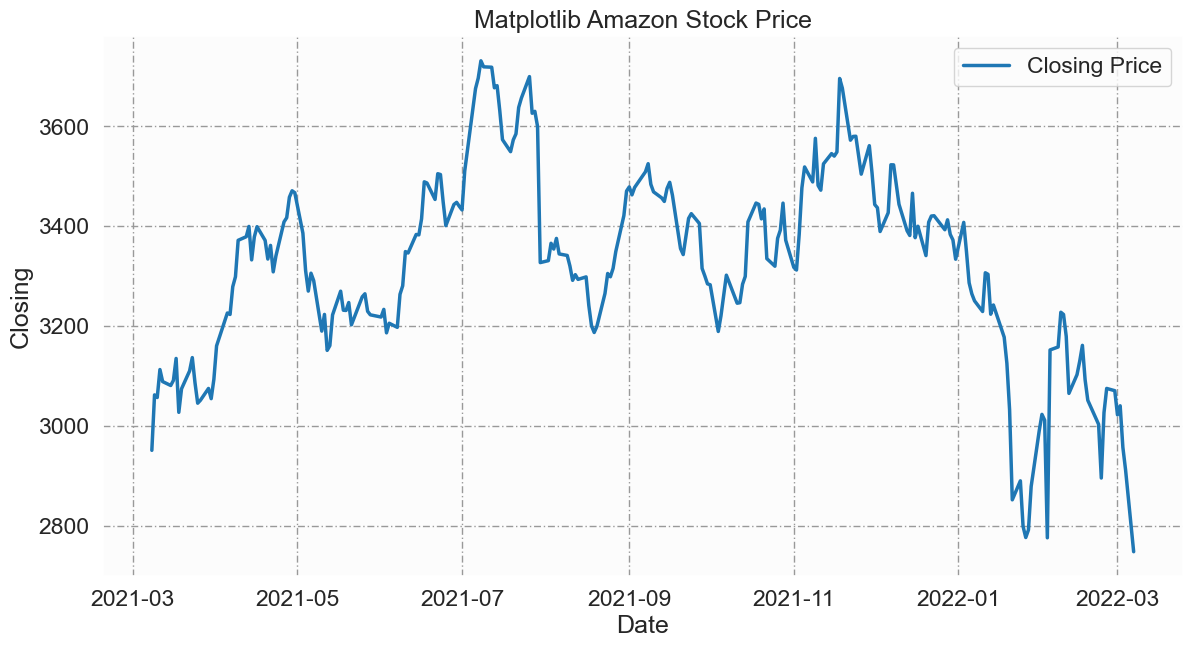

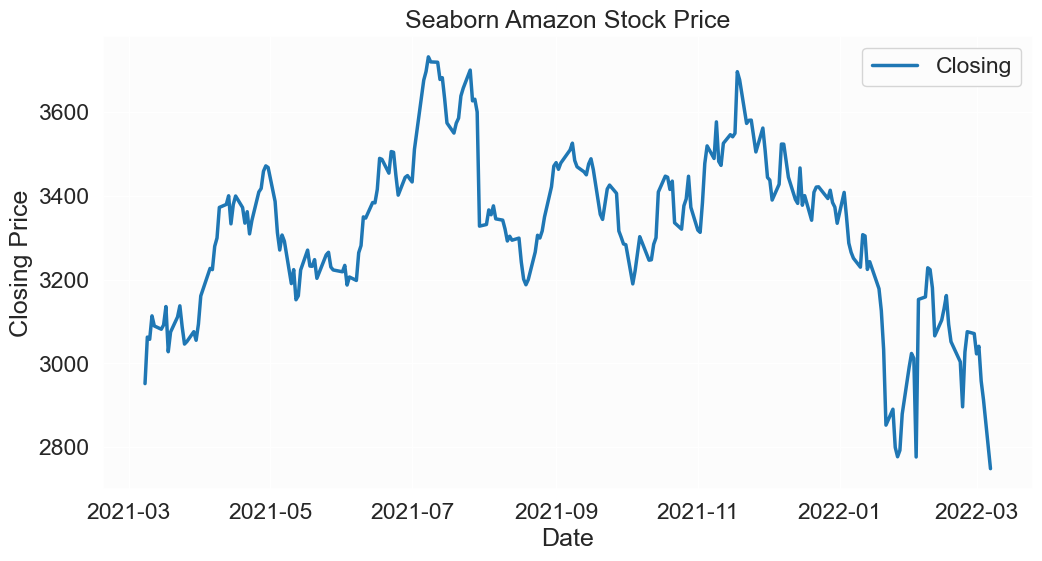

In [14]:
# Matplotlib
fig_1 =  plt.figure(figsize=(12, 6), dpi = 100)
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Date')
axes_1.set_ylabel('Closing')
axes_1.set_title('Matplotlib Amazon Stock Price')
axes_1.plot(df_1.index, df_1['Close'], label="Closing Price")
axes_1.legend(loc=0)
axes_1.grid(True, color = '0.6', dashes = (5, 2, 1, 2))


# Seaborn
fig_3 = plt.figure(figsize=(12, 6), dpi = 100)
axes_2 = sns.lineplot(data=df_1, x=df_1.index, y="Close", label = 'Closing')
axes_2.set(xlabel = "Date", ylabel='Closing Price')
axes_2.set_title('Seaborn Amazon Stock Price')
axes_2.legend(loc=0)
sns.set_style("darkgrid", {"axes.facecolor": ".99"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

#### Plotly

In [18]:
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df_1.index, y=df_1['Close'], mode='lines', name='Closing Price'))
fig_2.update_layout(
    xaxis=dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    yaxis=dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    showlegend=True,
    xaxis_title="Date",
    yaxis_title='Closing Price', 
    title='Plotly Amazon Stock Price'

)

#### Matplotlib Finance

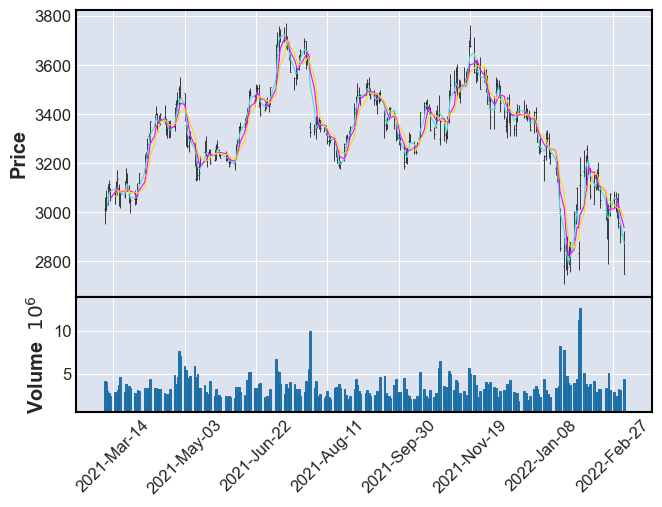

In [21]:
mpf.plot(df_1, type='ohlc', mav=(3, 5, 7), volume=True, show_nontrading=True)

#### Plotting TIme Periods & Styling 

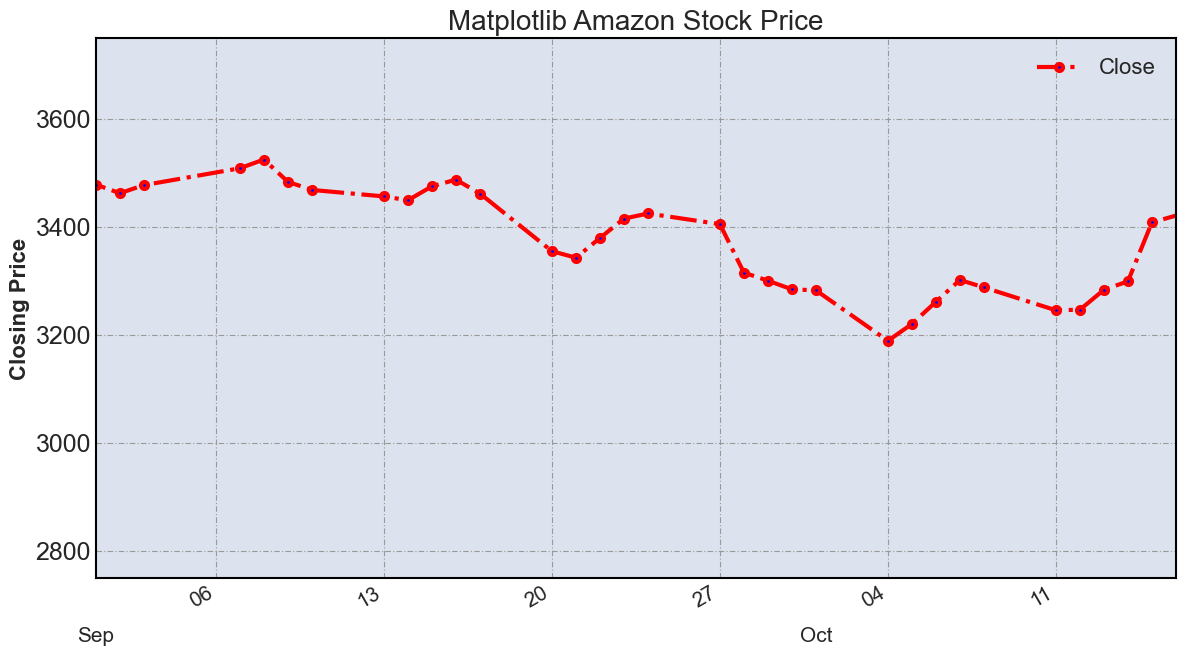

In [40]:
fig_1 =  plt.figure(figsize=(12, 6), dpi = 100)
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Date')
axes_1.set_ylabel('Closing')
axes_1.set_title('Matplotlib Amazon Stock Price', fontsize=20)

df_1['Close'].plot(figsize=(12, 6), 
                    xlim=['2021-09-01', '2021-10-16'], 
                    ylim=[2750, 3750], 
                    color='red', 
                    lw=3, ls='-.', 
                    marker = 'o', 
                    markersize=5, 
                    markerfacecolor='blue', 
                    markeredgecolor = 'red', 
                    markeredgewidth=3)

axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes =(5,2,1,2))

axes_1.tick_params(axis="x", labelsize=15)
axes_1.tick_params(axis="y", labelsize=18)

plt.xlabel('', fontsize=18)
plt.ylabel('Closing Price', fontsize = 16)              

plt.legend(loc=0, prop={'size': 16})

axes_1.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

axes_1.xaxis.set_major_formatter(dates.DateFormatter('%d'))
axes_1.xaxis.set_minor_locator(dates.MonthLocator())
axes_1.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

axes_1.tick_params(axis='both', which='minor', labelsize=15)
    

